In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns

In [2]:
df = pd.read_csv("spamTrain1.csv", header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0000,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0000,0.0102,0.0011,1
3,0.0000,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.0000,0.0000,-1.0,0.0121,0.0000,0.0,0.0000,0.0000,-1.0000,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,-1.0,0.0000,0.0000,0.0000,0.0000,...,-1.0,0.0,-1.0000,-1.0,-1.0,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,-1.0,0.0000,-1.0,0.0,0.0,0.0000,-1.0000,0.0000,0
1498,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,0.0000,0.0000,0.0000,-1.0000,...,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0000,0.0000,0.0188,0


<h1>Data Desc</h1>

<p>-1 Implies that the data is missing </p>
<p>Each feature corresponds to a word and denotes the proportion of all words in the email that match the given word</p>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
 16  16      1500 non-null   float64
 17  17      1500 non-null   float64
 18  18      1500 non-null   float64
 19  19      1500 non-null   float64
 20  20      1500 non-null   float64
 21  21      1500 non-null   float64
 22  

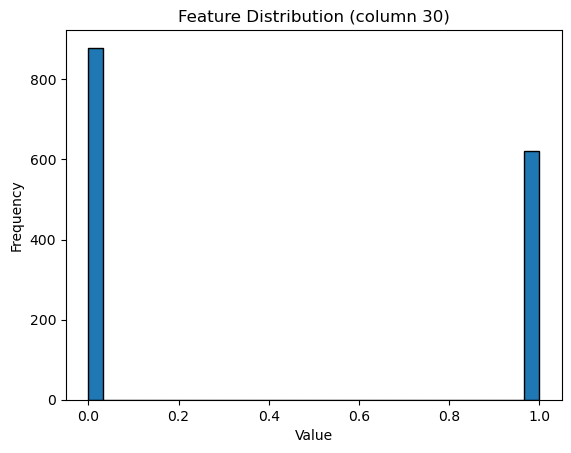

30
0    879
1    621
Name: count, dtype: int64


In [5]:
plt.hist(df[30], bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df[30].value_counts())

In [6]:
# Replace all the -1 with nan
df = df.replace(-1, np.nan)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,NaN,0.0,0.0000,NaN,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,NaN,0.0,0.0045,NaN,0.0,0.0000,0.0159,0.0000,0.0022,...,NaN,0.0,0.0088,0.0,0.0,0.0,NaN,0.0102,0.0011,1
3,0.0000,0.0050,0.0,NaN,0.0000,0.0,NaN,0.0000,0.0000,0.0000,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,NaN,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,0.0000,NaN,0.0121,0.0000,0.0,0.0000,0.0000,NaN,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,NaN,0.0000,0.0000,0.0000,0.0000,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,NaN,0.0,NaN,0.0000,0.0,NaN,0.0000,0.0000,0.0000,...,0.0,NaN,0.0000,NaN,0.0,0.0,0.0000,NaN,0.0000,0
1498,0.0000,NaN,0.0,NaN,0.0000,0.0,0.0000,0.0000,0.0000,NaN,...,0.0,NaN,0.0000,0.0,0.0,NaN,0.0000,0.0000,0.0188,0


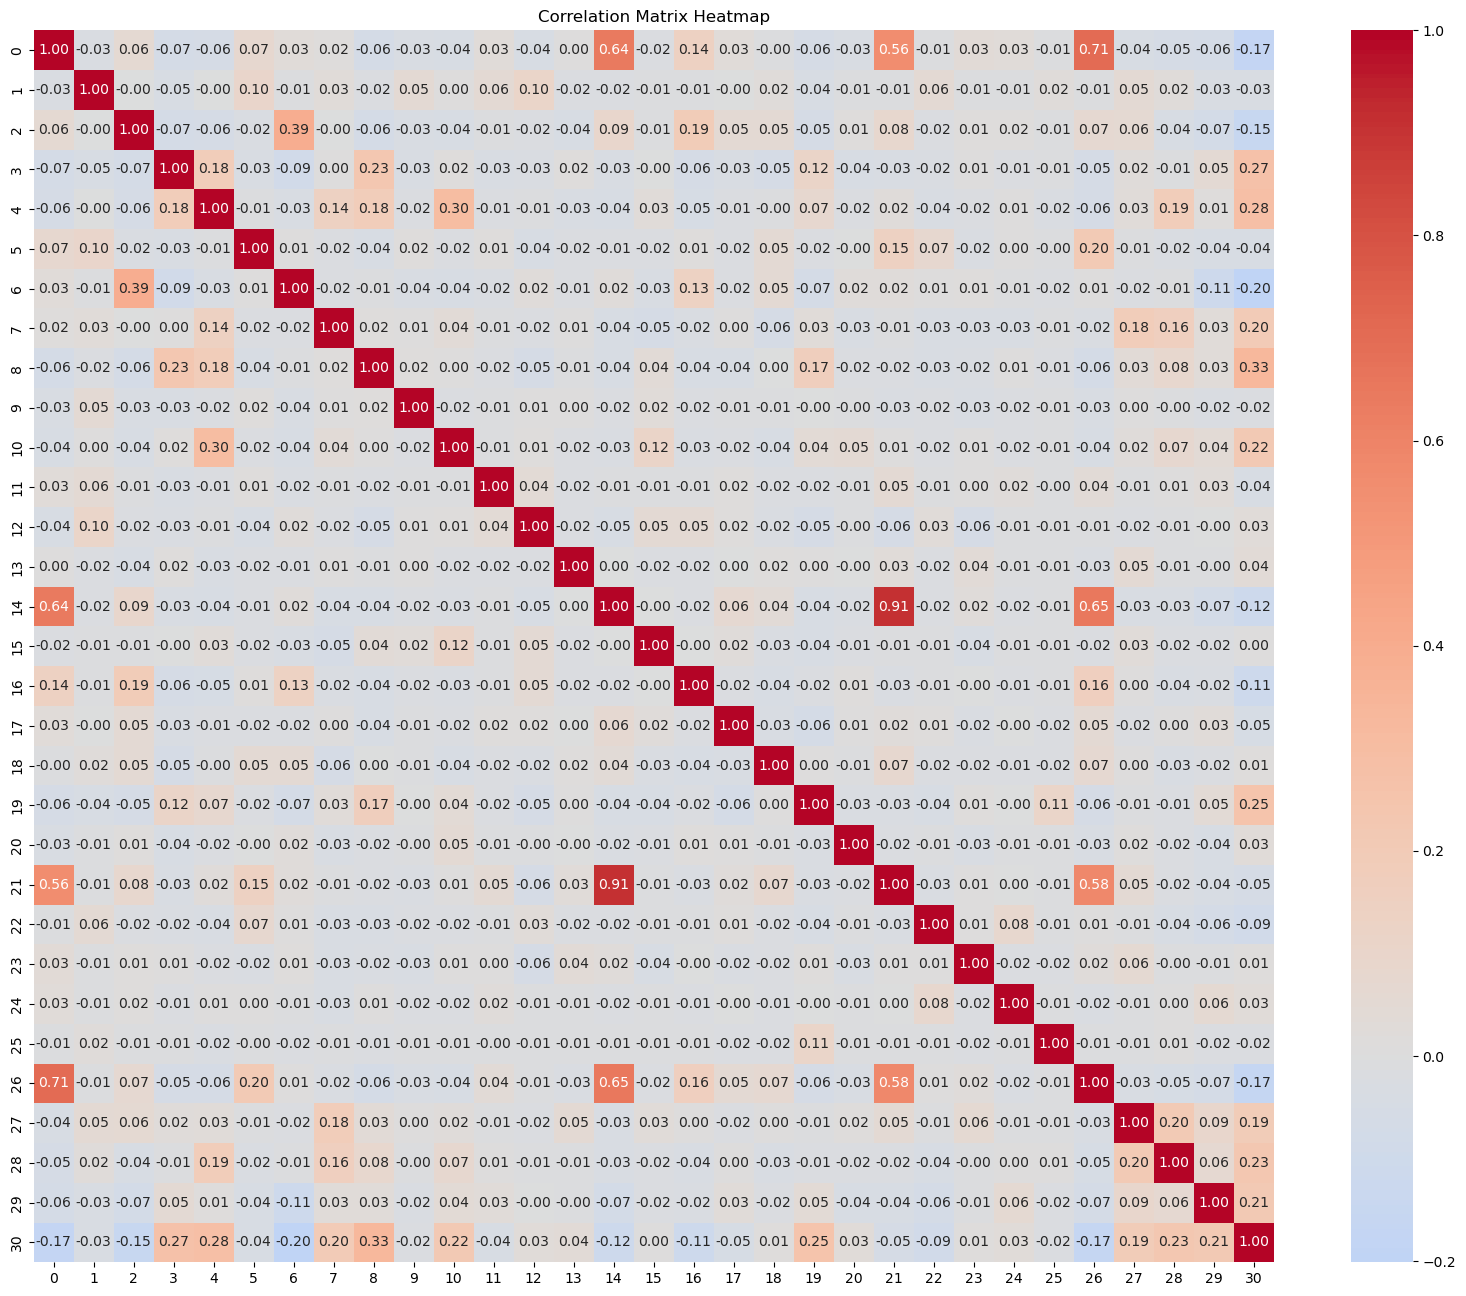

In [8]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


<h2>pandas.DataFrame.corr</h2>
<p> Compute pairwise correlation of columns, excluding NA/null values.</p>
<p>Clearly some columns are very similar in terms of linear relationship. We might interpet this as "words commonly used together" because the data represents the proportion of words found in a given email  </p>

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1218.000000,1228.000000,1198.000000,1187.000000,1194.000000,1211.000000,1211.000000,1208.000000,1200.000000,1195.000000,...,1183.000000,1190.000000,1202.000000,1201.000000,1198.000000,1192.000000,1202.000000,1203.000000,1186.000000,1500.000000
mean,0.001055,0.001009,0.000509,0.003097,0.001587,0.000932,0.001239,0.002275,0.001234,0.002212,...,0.000642,0.000684,0.001879,0.001750,0.000118,0.000974,0.000446,0.000939,0.003211,0.414000
std,0.004931,0.003540,0.002524,0.006516,0.004990,0.005979,0.003599,0.005875,0.003964,0.013364,...,0.003316,0.005813,0.005615,0.012537,0.002218,0.004764,0.002284,0.003053,0.005652,0.492713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.003800,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004700,1.000000
max,0.058800,0.046800,0.035700,0.062500,0.071400,0.100000,0.045400,0.075500,0.054000,0.142800,...,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.043400,1.000000


In [10]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [11]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1218 non-null   float64
 1   1       1228 non-null   float64
 2   2       1198 non-null   float64
 3   3       1187 non-null   float64
 4   4       1194 non-null   float64
 5   5       1211 non-null   float64
 6   6       1211 non-null   float64
 7   7       1208 non-null   float64
 8   8       1200 non-null   float64
 9   9       1195 non-null   float64
 10  10      1203 non-null   float64
 11  11      1191 non-null   float64
 12  12      1212 non-null   float64
 13  13      1195 non-null   float64
 14  14      1191 non-null   float64
 15  15      1186 non-null   float64
 16  16      1189 non-null   float64
 17  17      1223 non-null   float64
 18  18      1193 non-null   float64
 19  19      1210 non-null   float64
 20  20      1203 non-null   float64
 21  21      1183 non-null   float64
 22  

<h2>Dealing with NaNs</h2>
<p>We will have to use some imputation methods to deal with the missing values</p>
<p>Cannot drop misisng values, (99.8% data decrease), Impute mean or median or use regression technques </p>
<p>Split data into train and valudation. I don't believe that we need to scale the features due to them already being scaled by proportion </p>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer,SimpleImputer

In [13]:
X_train,X_val, y_train, y_val = train_test_split(features,target,test_size=0.20, random_state=42,shuffle=True)

In [14]:
mean_imputer = SimpleImputer(strategy='mean')
X_train_mean_imputation = pd.DataFrame(mean_imputer.fit_transform(X_train),
                                       columns=X_train.columns)
X_val_mean_imputation = pd.DataFrame(mean_imputer.transform(X_val),
                                     columns=X_val.columns)

median_imputer = SimpleImputer(strategy='median')
X_train_median_imputation = pd.DataFrame(median_imputer.fit_transform(X_train),
                                         columns=X_train.columns)
X_val_median_imputation = pd.DataFrame(median_imputer.transform(X_val),
                                       columns=X_val.columns)
knn_imputer = KNNImputer(n_neighbors=5)
X_train_knn_imputation = pd.DataFrame(knn_imputer.fit_transform(X_train),
                                      columns=X_train.columns)
X_val_knn_imputation = pd.DataFrame(knn_imputer.transform(X_val),
                                    columns=X_val.columns)


In [15]:
X_train_mean_imputation.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.001110,0.001014,0.000525,0.003149,0.001611,0.000925,0.001266,0.002347,0.001153,0.002254,...,0.001392,0.000644,0.000659,0.001923,0.001538,0.000144,0.001025,0.000473,0.000911,0.003304
std,0.004642,0.003212,0.002173,0.005946,0.004536,0.005110,0.003341,0.005353,0.003258,0.011977,...,0.007128,0.002845,0.005393,0.005265,0.010469,0.002214,0.004371,0.002159,0.002765,0.005079
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002600
75%,0.001110,0.001014,0.000525,0.003149,0.001611,0.000606,0.001266,0.002347,0.001153,0.002254,...,0.001392,0.000644,0.000659,0.001923,0.000000,0.000000,0.001025,0.000473,0.000911,0.003304
max,0.058800,0.046800,0.030300,0.062500,0.071400,0.100000,0.045400,0.075500,0.032700,0.142800,...,0.111100,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.040000


In [16]:
X_train_median_imputation.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.000912,0.000831,0.000426,0.002509,0.001287,0.000748,0.001023,0.001903,0.000921,0.001801,...,0.001109,0.000512,0.000521,0.001545,0.001247,0.000115,0.000822,0.000379,0.000729,0.002596
std,0.004661,0.003235,0.002183,0.006080,0.004581,0.005123,0.003378,0.005432,0.003291,0.012011,...,0.007150,0.002857,0.005400,0.005320,0.010486,0.002215,0.004390,0.002167,0.002789,0.005257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.002500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003300
max,0.058800,0.046800,0.030300,0.062500,0.071400,0.100000,0.045400,0.075500,0.032700,0.142800,...,0.111100,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.040000


In [17]:
X_train_knn_imputation.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.001000,0.000965,0.000465,0.003000,0.001511,0.000958,0.001235,0.002225,0.001053,0.002286,...,0.001710,0.000581,0.000643,0.001903,0.001364,0.000120,0.000971,0.000414,0.000897,0.003240
std,0.004698,0.003243,0.002194,0.006065,0.004582,0.005250,0.003414,0.005491,0.003315,0.012326,...,0.007602,0.003004,0.005438,0.005443,0.010533,0.002215,0.004447,0.002182,0.002836,0.005218
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000900
75%,0.000000,0.000360,0.000000,0.003700,0.000985,0.000000,0.000250,0.002000,0.000000,0.000365,...,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,0.000000,0.000000,0.000000,0.004700
max,0.058800,0.046800,0.030300,0.062500,0.071400,0.100000,0.045400,0.075500,0.032700,0.142800,...,0.111100,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.040000


In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc


In [19]:
models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RidgeClassifier": RidgeClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier( 
        eval_metric='logloss', 
        random_state=42,
        max_depth=2,
        min_child_weight=10,# limit tree depth
        n_estimators=50, # smaller number of trees
        learning_rate=0.05,
        subsample=0.8,    # row sampling
        colsample_bytree=0.8, # column sampling
        reg_alpha=2,    # L1 regularization
        reg_lambda=3      # L2 regularization
    )
}

In [20]:

def tpr_at_fpr(y_true, y_score, fpr_target=0.01):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    # Interpolate TPR at the target FPR
    return np.interp(fpr_target, fpr, tpr)


<h2>Model Training & Testing</h2>
<h4>At this point, we will need to decide which data to use. While we could perform our operations on all of them, it eaiser to just hold them in one variable and change the variable for each different type of training and validation dataset, keeping track of which performs the best</h4>
<h4>Note that our y_train and y_val remain untouched as those are just the target values. There is no need to perform anything on them unless values are missing which is not the case for this dataset</h4>

In [21]:
X_train_cur = X_train_median_imputation
X_val_cur = X_val_median_imputation

In [22]:
X_train_cur.shape,X_val_cur.shape, y_train.shape, y_val.shape

((1200, 30), (300, 30), (1200,), (300,))

In [23]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    aucs = []
    tprs = []
    for train_idx, val_idx in cv.split(X_train_cur, y_train):
        X_train_stratified, X_val_stratified = X_train_cur.iloc[train_idx], X_train_cur.iloc[val_idx]
        y_train_stratified, y_val_stratified = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_train_stratified, y_train_stratified)
        
        # Some models output probabilities, some don't
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_val_stratified)[:, 1]
        else:
            y_scores = model.decision_function(X_val_stratified)
        
        aucs.append(roc_auc_score(y_val_stratified, y_scores))
        tprs.append(tpr_at_fpr(y_val_stratified, y_scores, fpr_target=0.01))
    
    results[name] = {
        "Mean AUC": np.mean(aucs),
        "Mean TPR@1%FPR": np.mean(tprs)
    }
results


{'GaussianNB': {'Mean AUC': np.float64(0.82865),
  'Mean TPR@1%FPR': np.float64(0.09265392156862745)},
 'LogisticRegression': {'Mean AUC': np.float64(0.8145714285714286),
  'Mean TPR@1%FPR': np.float64(0.1)},
 'RidgeClassifier': {'Mean AUC': np.float64(0.8238),
  'Mean TPR@1%FPR': np.float64(0.10200000000000001)},
 'DecisionTree': {'Mean AUC': np.float64(0.7844285714285715),
  'Mean TPR@1%FPR': np.float64(0.04272525490196079)},
 'SVM': {'Mean AUC': np.float64(0.8875928571428571),
  'Mean TPR@1%FPR': np.float64(0.308)},
 'XGBoost': {'Mean AUC': np.float64(0.8947142857142858),
  'Mean TPR@1%FPR': np.float64(0.47359999999999997)}}

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

aucs = []

for train_idx, val_idx in cv.split(X_train_cur, y_train):
    X_train_stratified, X_val_stratified = X_train_cur.iloc[train_idx], X_train_cur.iloc[val_idx]
    y_train_stratified, y_val_stratified = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_train_stratified)
    X_val_scaled = scaler.transform(X_val_stratified)
    
    model = SVC(probability=True, random_state=42)
    model.fit(X_tr_scaled, y_train_stratified)
    
    y_scores = model.predict_proba(X_val_scaled)[:, 1]
    aucs.append(roc_auc_score(y_val_stratified, y_scores))

print("Mean train AUC per fold (scaled):", np.mean(aucs))


Mean train AUC per fold (scaled): 0.8938928571428573


In [25]:
"""
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

svm = SVC(probability=True, random_state=42)

grid = GridSearchCV(svm, param_grid, scoring='roc_auc', cv=5)
grid.fit(X_scaled, y_train)

tprs.append(tpr_at_fpr(y_val, y_scores_val, fpr_target=0.01))


print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)
# After running the loop
print("SVM TPR@1%FPR per fold:", tprs)  # when model name == "SVM"
"""

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'C\': [0.1, 1, 10],\n    \'gamma\': [\'scale\', 0.01, 0.1, 1],\n    \'kernel\': [\'rbf\']\n}\n\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X_train)\n\nsvm = SVC(probability=True, random_state=42)\n\ngrid = GridSearchCV(svm, param_grid, scoring=\'roc_auc\', cv=5)\ngrid.fit(X_scaled, y_train)\n\ntprs.append(tpr_at_fpr(y_val, y_scores_val, fpr_target=0.01))\n\n\nprint("Best params:", grid.best_params_)\nprint("Best CV AUC:", grid.best_score_)\n# After running the loop\nprint("SVM TPR@1%FPR per fold:", tprs)  # when model name == "SVM"\n'

In [26]:
df_results = pd.DataFrame(results).T.sort_values(by="Mean AUC", ascending=False)
print(df_results)


                    Mean AUC  Mean TPR@1%FPR
XGBoost             0.894714        0.473600
SVM                 0.887593        0.308000
GaussianNB          0.828650        0.092654
RidgeClassifier     0.823800        0.102000
LogisticRegression  0.814571        0.100000
DecisionTree        0.784429        0.042725


In [27]:
#OVERFITTING CHECK 
# Scale the train and validation sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_cur)
X_val_scaled = scaler.transform(X_val_cur)  # if you have a separate validation set

# Train SVM with best parameters
final_svm = SVC(
    C=10,
    gamma=0.01,
    kernel='rbf',
    probability=True,
    random_state=42
)
final_svm.fit(X_train_scaled, y_train)

# Predict probabilities
y_train_scores = final_svm.predict_proba(X_train_scaled)[:, 1]
y_val_scores   = final_svm.predict_proba(X_val_scaled)[:, 1]

# Compute AUC
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(y_train, y_train_scores)
val_auc   = roc_auc_score(y_val, y_val_scores)

print(f"Train AUC: {train_auc}")
print(f"Validation AUC: {val_auc}")


Train AUC: 0.9420128571428572
Validation AUC: 0.9010803822891177


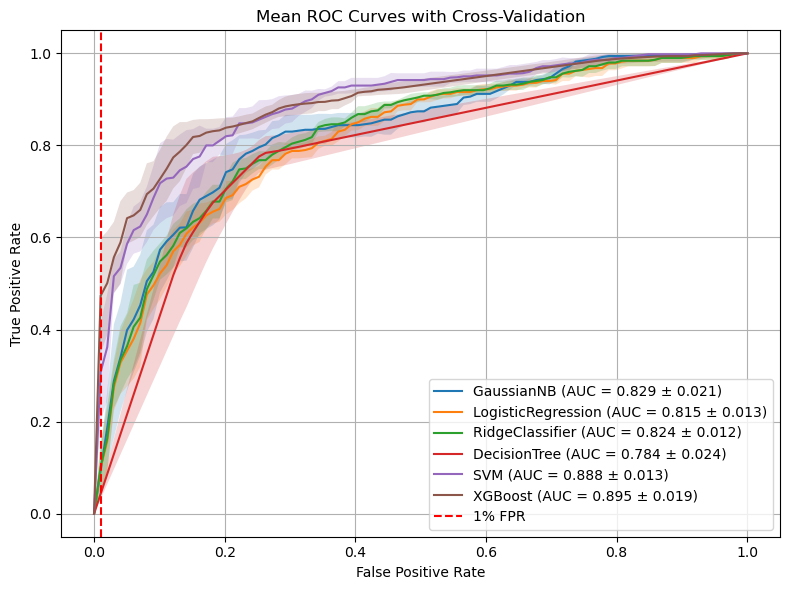

In [28]:
def plot_mean_roc(model, X, y, n_splits=5, label=None):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_idx, val_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X.iloc[val_idx])[:, 1]
        else:
            y_score = model.decision_function(X.iloc[val_idx])
            
        fpr, tpr, _ = roc_curve(y.iloc[val_idx], y_score)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        fold_auc = auc(fpr, tpr)
        aucs.append(fold_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, label=f"{label} (AUC = {mean_auc:.3f} ± {std_auc:.3f})")
    plt.fill_between(mean_fpr,
                     np.maximum(mean_tpr - np.std(tprs, axis=0), 0),
                     np.minimum(mean_tpr + np.std(tprs, axis=0), 1),
                     alpha=0.2)

plt.figure(figsize=(8, 6))

for name, model in models.items():
    plot_mean_roc(model, X_train_cur, y_train, label=name)

plt.axvline(x=0.01, color='red', linestyle='--', label='1% FPR')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mean ROC Curves with Cross-Validation")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


10-fold cross-validation mean AUC:  0.8216676855824521
Test set AUC:  0.801125554850983


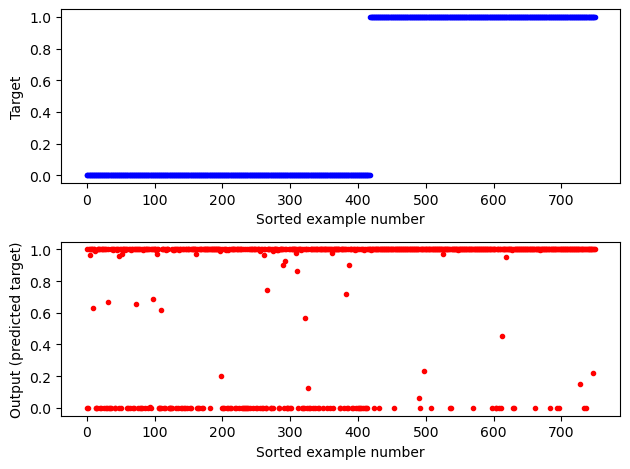

In [29]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()


In [30]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain2.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr

"""
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
"""
## ******************* REPLACING HIS FEATURES WITH X_TRAIN Y_TRAIN ***************
trainFeatures = X_train
trainLabels = y_train
testFeatures = X_test
testLabels = y_test

testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()


NameError: name 'X_test' is not defined

In [ ]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
#from classifySpam import predictTest
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain1.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()

In [ ]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs

    
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()
